# PROBLEM STATEMENT

An FMCG company which has entered into the instant noodles business two years back has noticed a mismatch in the demand and supply of products to various Warehouses. Where the demand is high, the product supply is pretty low and vice versa which is causing huge inventory cost loss to the company. Hence the higher management wants to optimize the supply quantity to every warehouse in the entire country.

* Goal & Objective: 
    
To build a model, using historical data that will determine the optimum weight of the product to be shipped each time to the warehouse.
To analyze the demand pattern in different pockets of the country so management can drive the advertisement campaign, particularly in those pockets.

* Challenge:
    
This is the first phase of the agreement; hence, the company has shared only very limited information. The company will open the 360-degree data lake to build a more robust model only after showcasing a tangible impact with this limited information.


### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Dataset.csv")

In [3]:
pd.set_option("display.max_columns",None)
df.head(15)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,0,0,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,0,0,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,Rented,45,0,0,0,241,23.0,NaN,18,0,C,6,24,24093
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,0,0,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,0,0,0,78,43.0,NaN,6,0,C,6,2,7130


# UNDERSTANDING THE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### Check for duplicates

In [5]:
df.duplicated().sum()

0

There are no duplicates in the dataset

### Check for missing values

In [6]:
df.isna().sum().sum()

13779

There are missing values in the dataset

# EDA

In [7]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [8]:
df.describe(include="object")

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
count,25000,25000,25000,25000,25000,25000,25000,24092
unique,25000,25000,2,3,4,6,2,5
top,WH_100000,EID_50000,Rural,Large,North,Zone 6,Company Owned,C
freq,1,1,22957,10169,10278,8339,13578,5501


In [9]:
#unique count of categorical columns
categorical_cols=["Ware_house_ID","WH_Manager_ID","Location_type","WH_capacity_size","zone","WH_regional_zone","wh_owner_type","flood_impacted","flood_proof","electric_supply","temp_reg_mach","approved_wh_govt_certificate"]
df[categorical_cols].nunique()

Ware_house_ID                   25000
WH_Manager_ID                   25000
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
wh_owner_type                       2
flood_impacted                      2
flood_proof                         2
electric_supply                     2
temp_reg_mach                       2
approved_wh_govt_certificate        5
dtype: int64

The columns  Ware_house_ID and WH_Manager_ID are the unique ids of each warehouse and its manager respectively.Hence the columns can be removed as it is less significant in our model.

In [10]:
df.drop(["Ware_house_ID","WH_Manager_ID"],axis=1,inplace=True)

In [11]:
categorical_cols.remove("Ware_house_ID")
categorical_cols.remove("WH_Manager_ID")

In [12]:
# Minimum and maximumvalues for all numerial columns

cont_cols=list(filter(lambda col:col not in categorical_cols,df.columns))
pd.DataFrame(np.array([[df[col].min(),df[col].max()] for col in df[cont_cols].columns]),index=df[cont_cols].columns,columns=["min","max"])

,min,max
num_refill_req_l3m,0.0,8.0
transport_issue_l1y,0.0,5.0
Competitor_in_mkt,0.0,12.0
retail_shop_num,1821.0,11008.0
distributor_num,15.0,70.0
dist_from_hub,55.0,271.0
workers_num,10.0,98.0
wh_est_year,1996.0,2023.0
storage_issue_reported_l3m,0.0,39.0
wh_breakdown_l3m,0.0,6.0


## Missing Values

In [13]:
missing_percent=df.isna().mean()*100
missing_percent

Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

##### * There is significant number of missing values in the Whareshouse established year column. 
##### *There is less than 4% missing values in workers number and approved wh_govt_certificate columns

### Analysis of Target Variable

<Figure size 1600x1600 with 0 Axes>

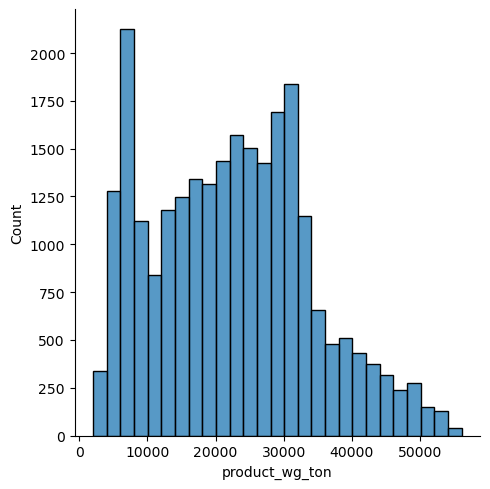

In [14]:
plt.figure(figsize=(16,16))
sns.displot(df,x="product_wg_ton",binwidth=2000)

<Axes: xlabel='product_wg_ton'>

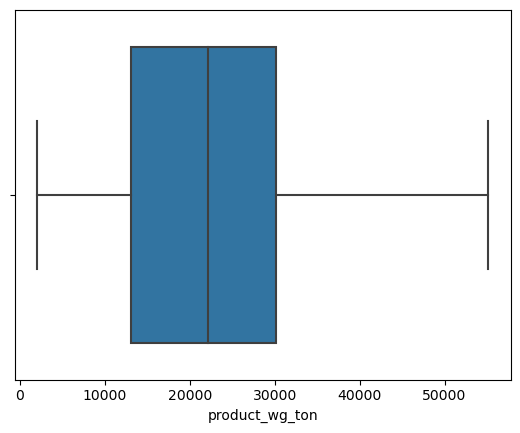

In [15]:
sns.boxplot(x=df["product_wg_ton"])

##### The distribution of the target variable  is found to be skewed towards the right indicating the presence of some extreme higher values. 

## Univariate Analysis

### Count plot of categorical columns

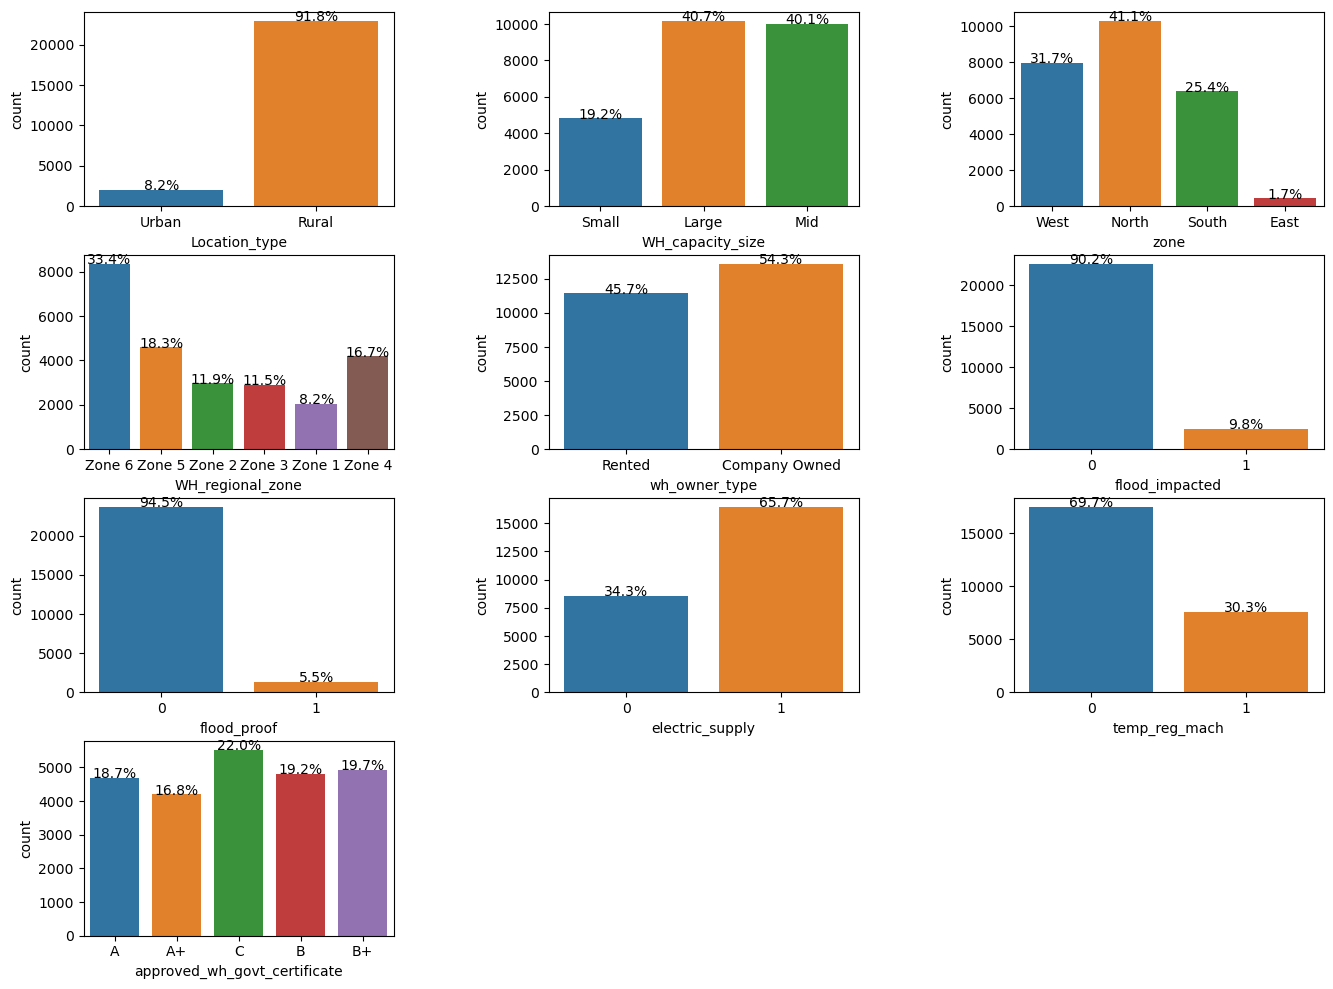

In [16]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(wspace=0.5,hspace=0.25)

for i in range(len(categorical_cols)):
    plt.subplot(4,3,i+1)
    ax=sns.countplot(x=categorical_cols[i],data=df)
    total=len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.2,f'{height/total:.1%}', ha="center")


#### Observations: 
1. 92% of the Warehouses are located in Rural areas.
2. 80% of the warehouses are have Large or Mid capacity size.
3. Highest number of warehouses( approx 41%) are located in the Northern region and lowest in East(less than 2%).Out of the subzones zone 6 has highest number of warehouses.
4. C category warehouses are comparatively higher in numbers than the others.
    

### Distribution plot of numerical variables

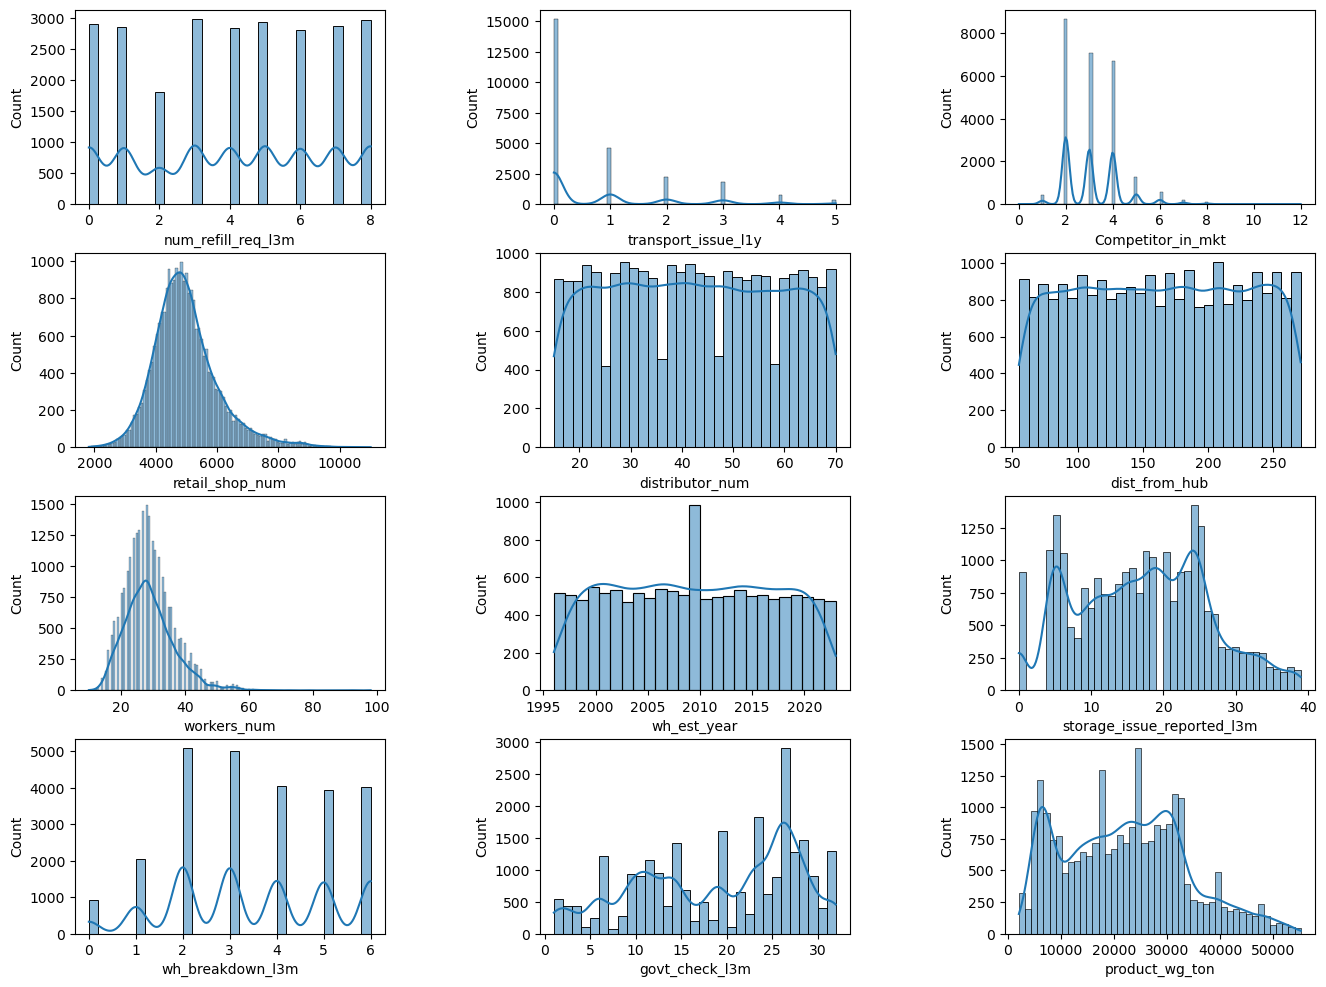

In [17]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(wspace=0.5,hspace=0.25)

for i in range(len(cont_cols)):
    plt.subplot(4,3,i+1)
    sns.histplot(df[cont_cols[i]],kde=True)

### Box plots of numerical variables

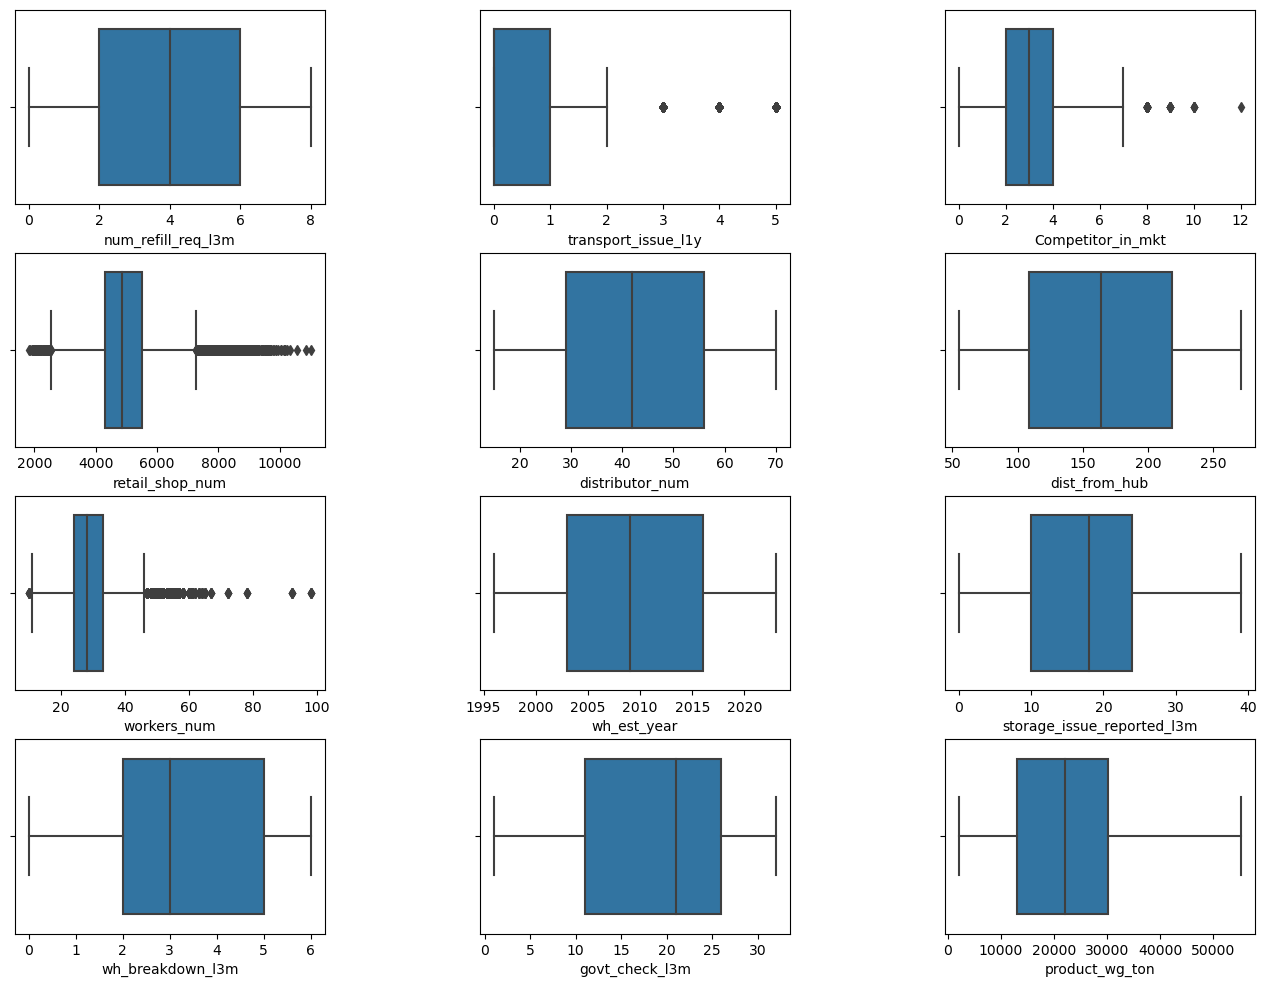

In [18]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(wspace=0.5,hspace=0.25)

for i in range(len(cont_cols)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[cont_cols[i]])

 We can observe the presence of outliers in the independent transport_issue_l1y,Competetitor_in_mkt,retail_shop_num and wrokers_num. The presence of outliers in the above features needs to be analysed.

### Bivariate analysis of categorical columns with target column

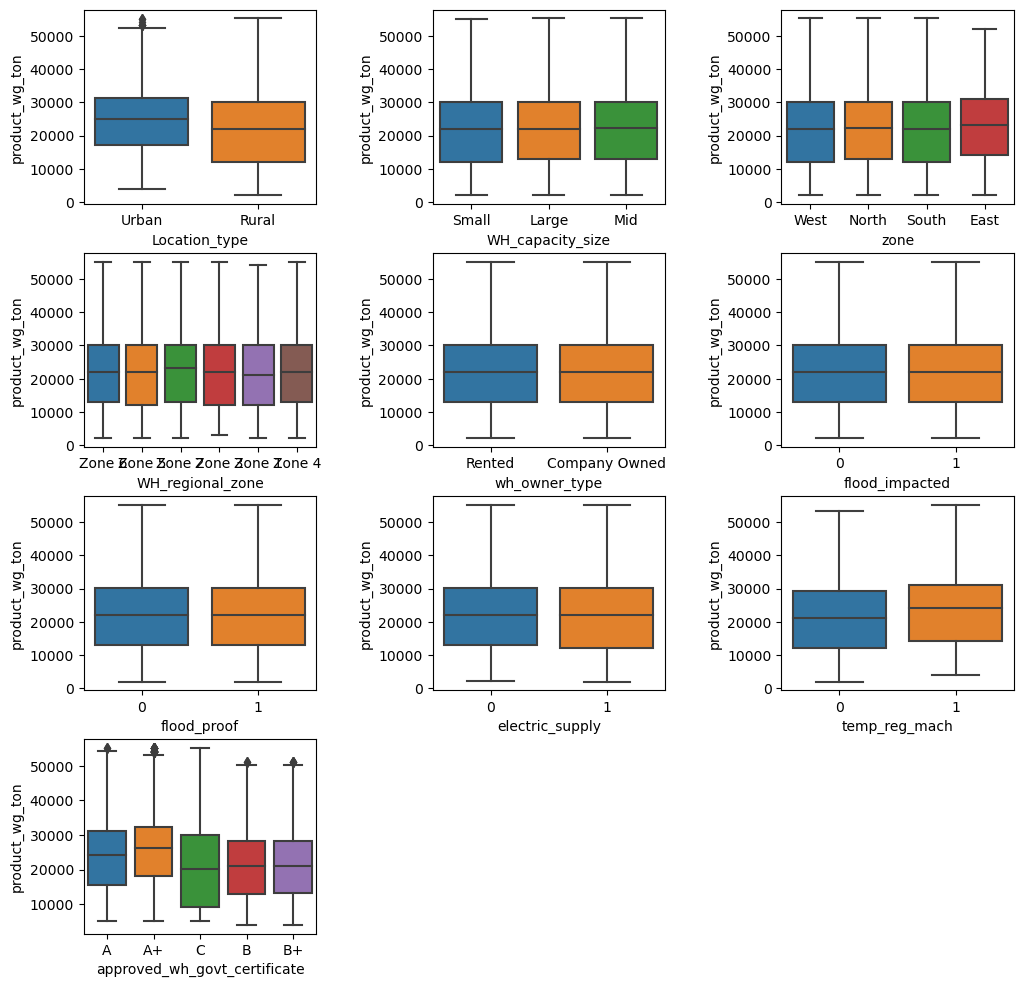

In [19]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.50,hspace=0.25)

for i in range(len(categorical_cols)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=df[categorical_cols[i]],y=df["product_wg_ton"])
    

#### From the above box plots, the columns Location_type and approved_wh_govt_certificate shows more variations in the target values.

### Bivariate analysis of numerical columns with the target column

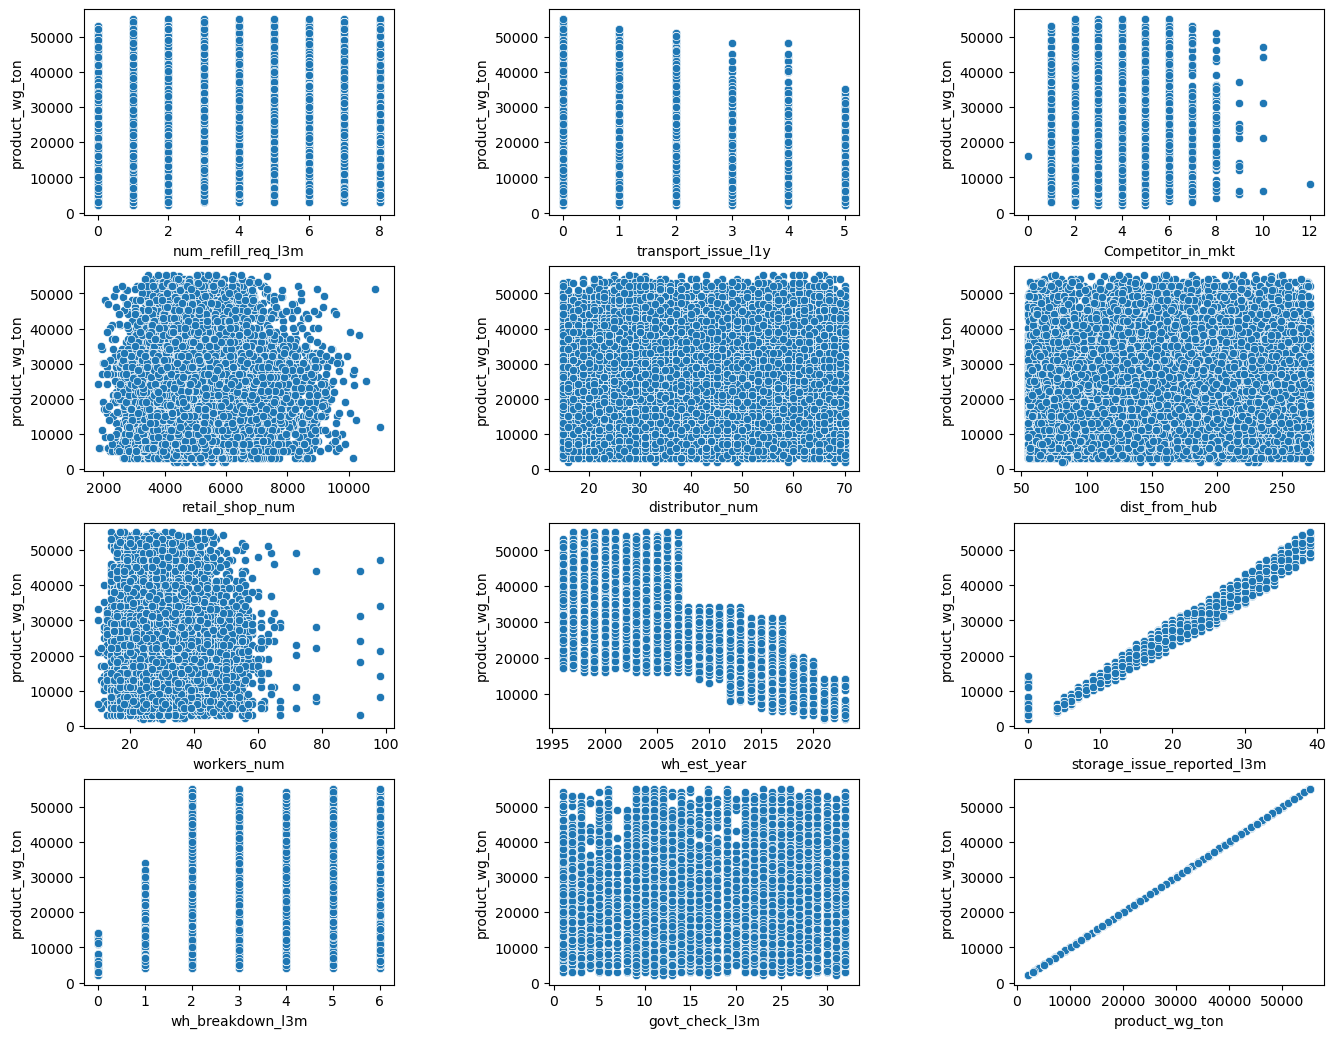

In [20]:
plt.figure(figsize=(16,16))
plt.subplots_adjust(wspace=0.5,hspace=0.25)
#df_cleaned=df.dropna()

for i in range(len(cont_cols)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(data=df,x=df[cont_cols[i]],y=df["product_wg_ton"])

### Observations:


* We can see a perfect positive linear relationship of the storage issues reported column with the target variable.However at the point 0 of storage issues reported we can see some variations in the target values.It is possible that the value 0 represents missing values rather than actual 0.


* Warehouse established year also shows negative linear relationship with the target column.

* Warehouse breakdown shows positive variations with the target.


* We can see the presence of outliers in the columns: competitors in the market,retail shop number and workers number which are also not relevant with respect to the target.The presence of these outliers were also detected from their corresponding box plots above. Hence these outliers need to be addressed.

### Zone wise analysis to find the demand/supply pattern

([<matplotlib.patches.Wedge at 0x17e45771550>,
 [Text(0.3031715717411325, 1.0573963297118123, 'North'),
  Text(-0.9960735584775837, -0.466730614061049, 'West'),
  Text(0.6774696528601069, -0.8666226799787821, 'South'),
  Text(1.0984019452881495, -0.05927197134573127, 'East')],
 [Text(0.16536631185879952, 0.5767616343882611, '41%'),
  Text(-0.5433128500786819, -0.2545803349423903, '32%'),
  Text(0.36952890156005824, -0.47270327998842654, '25%'),
  Text(0.599128333793536, -0.03233016618858069, '2%')])

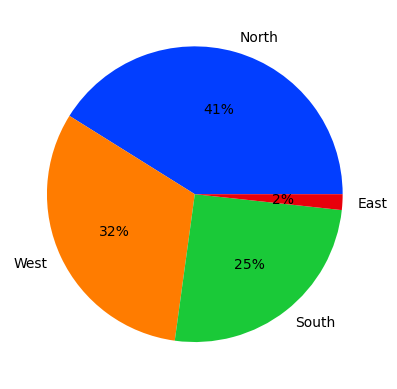

In [21]:
# Percentage warehouses in each zone

zone=df["zone"].value_counts()
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(zone.values,labels=zone.index, colors=palette_color, autopct='%.0f%%') 

<Axes: xlabel='zone', ylabel='count'>

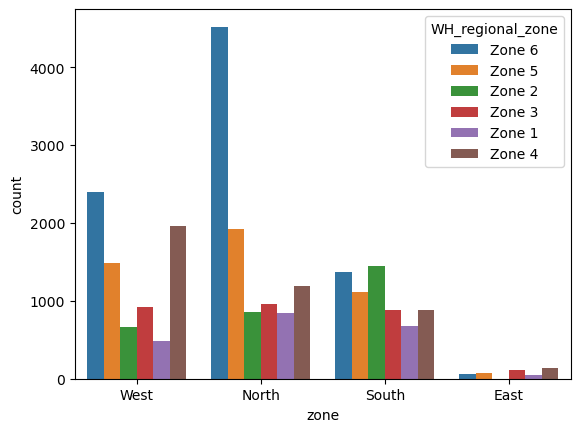

In [22]:
#Count of warehouses in each subzone within the 4 zones

sns.countplot(df,x="zone",hue="WH_regional_zone")

In [23]:
#zone wise mean of product_wg_ton

df.groupby("zone").agg({"product_wg_ton":"mean"})

,product_wg_ton
zone,
East,22721.452214
North,22199.437926
South,21933.495913
West,22079.384189


In [24]:
#sub- zone wise mean of product_wg_ton

df.groupby("WH_regional_zone").agg({"product_wg_ton":"mean"})

,product_wg_ton
WH_regional_zone,
Zone 1,21742.712756
Zone 2,22470.728316
Zone 3,21968.146477
Zone 4,22173.378592
Zone 5,22022.588402
Zone 6,22115.559540


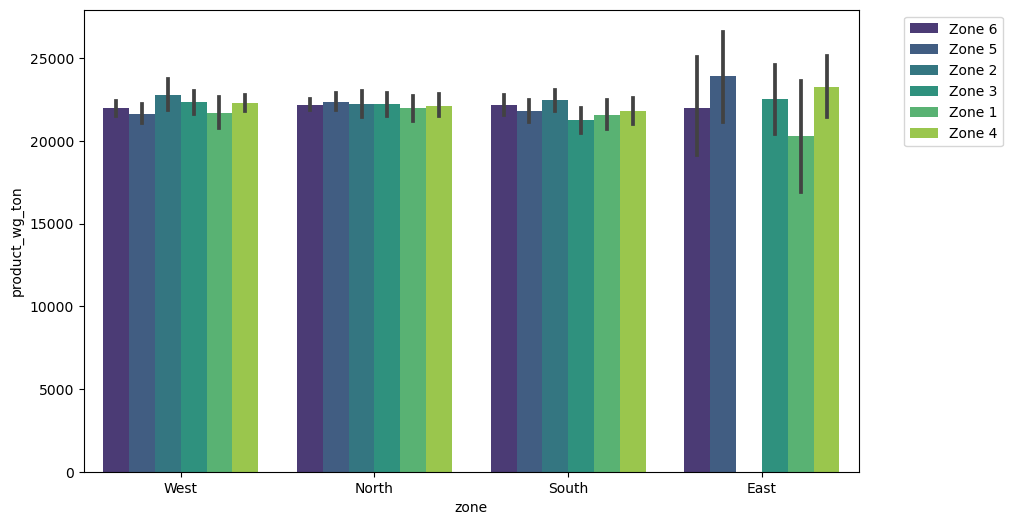

In [25]:
# plotting the zone and subzone wise product_wg_ton

plt.figure(figsize=(10,6))
sns.barplot(df,x="zone",y="product_wg_ton",hue="WH_regional_zone",palette=("viridis"))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

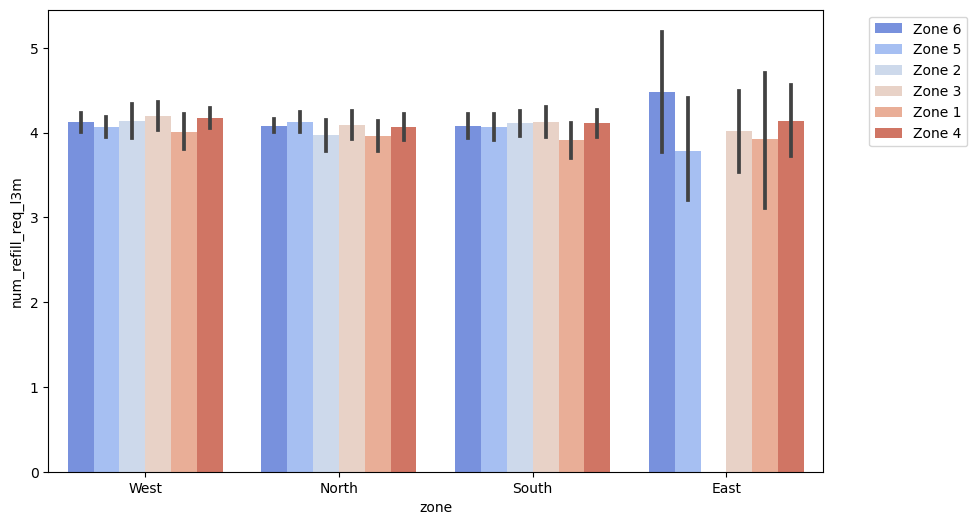

In [26]:
# plotting the zone and subzone wise num_refill_req_l3m

plt.figure(figsize=(10,6))
sns.barplot(df,x="zone",y="num_refill_req_l3m",hue="WH_regional_zone",palette=("coolwarm"))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<Axes: xlabel='zone', ylabel='storage_issue_reported_l3m'>

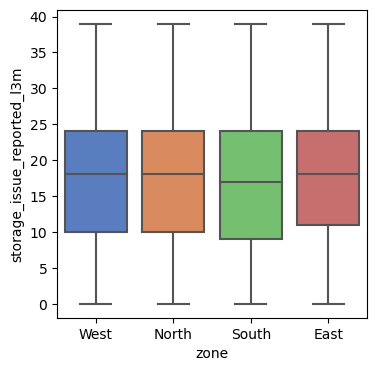

In [27]:
# Plotting zone wise storage_issue_reported_l3m

plt.figure(figsize=(4,4))
sns.boxplot(df,x="zone",y="storage_issue_reported_l3m",palette="muted")

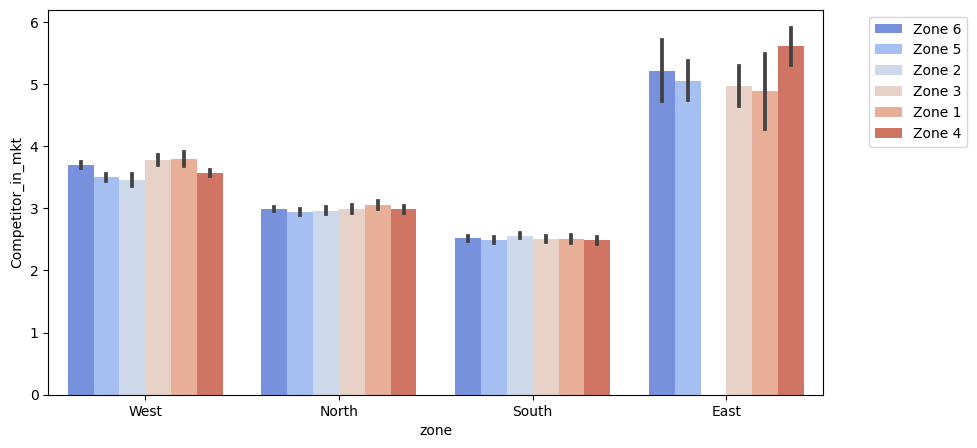

In [28]:
# plotting the zone and subzone wise Competitor_in_mkt

plt.figure(figsize=(10,5))
sns.barplot(df,x="zone",y="Competitor_in_mkt",hue="WH_regional_zone",palette=("coolwarm"))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0.5, 1.0, 'Zone-wise flood impacted count with and without flood-proofing')

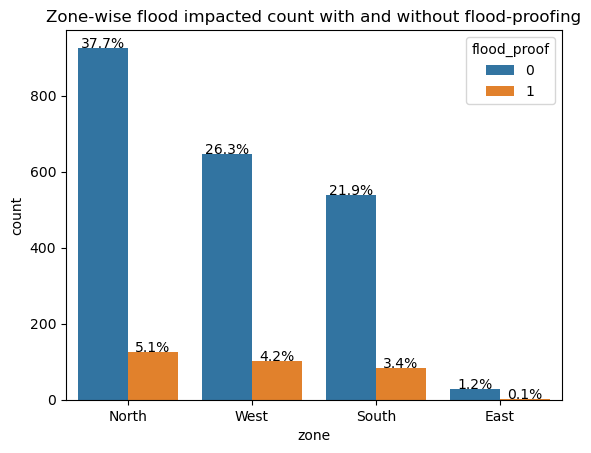

In [29]:
# plotting the zonewise flood impacted count with and without flood-proofing

ax=sns.countplot(df[df["flood_impacted"]==1],x="zone",hue="flood_proof")

total=len(df[df["flood_impacted"]==1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2,f'{height/total:.1%}', ha="center")
    
plt.title("Zone-wise flood impacted count with and without flood-proofing")
    

#### Observations:
1. North zone is having the highest number of warehouses contributing to 41% of the total warehouses of which the major contribution is from Zone 6.
2. East is having the least number of warehouses(less than 2%) with no warehouse in zone2.
3. Warehouses in east have higher average product supply mainly in zone 5 compared to other regions.
4. East region warehouses also has highest number of refill requests.
5. Highest competitors are in eastern zones followed by west and least being South.
6. Storage issues reported are almost similar in all regions.
7. Only 13% percent of total warehouses impacted by flood in last 3 months is flood_proof. Every region has a considerable number of flood affected warehouses which are not flood_proof.

#### Inference:

1. The highest competitors in east followed by west indicates the favourable customer segment in these regions. Management can drive advertisement campaigns in the zones of east and west with highest competitors.

2. East region tends to have more demand for the product with higher average product weight compared to other regions. More refill requests in the East can be an indication of faster replenishment. Since the number of warehouses in East is very less, Management to unleash the potential of attaching more warehouses so as to cover more areas in east.

3. The high number of flood impacted warehouses without flood proofing could result in damaged products.

### Bivariate analysis of other independent Features

<Axes: xlabel='distributor_num', ylabel='retail_shop_num'>

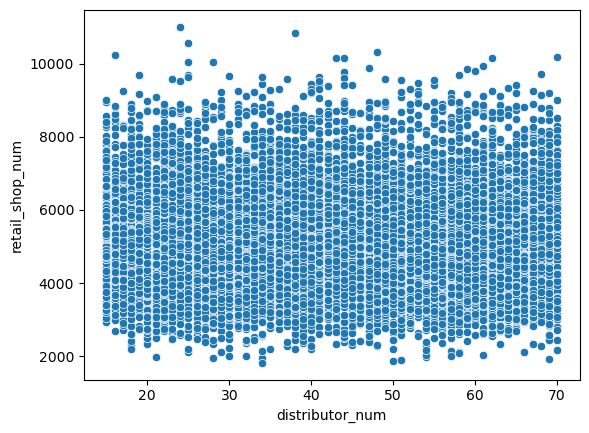

In [30]:
#Plotting distributor_num vs retail_shop_num

sns.scatterplot(df,x="distributor_num",y="retail_shop_num")

The distributor_num and retail shops shows no correlation with each other. Since the product requires faster replenishment, timely distribution to all retails shops should be ensured.Hence where the retail shops are more there should be more distributors available. If otherwise it can cause stiorage issues due to overstacking of products at warehouses 

#### Analysing the Govt_approved Certificate column

In [31]:
#Finfind percetage of warehouses in each grade having temp_re_mach,electric_supply,flood_proof

govt_cert=(df.groupby("approved_wh_govt_certificate").agg({"temp_reg_mach":"mean",
                                                "electric_supply":"mean",
                                               "flood_proof":"mean"}))*100
govt_cert=govt_cert.reset_index()
govt_cert

,approved_wh_govt_certificate,temp_reg_mach,electric_supply,flood_proof
0,A,20.445301,65.489189,5.780347
1,A+,76.115486,65.473634,5.702696
2,B,20.615129,64.941812,4.966750
3,B+,19.849502,66.402278,5.084401
4,C,26.486093,66.006181,5.689875


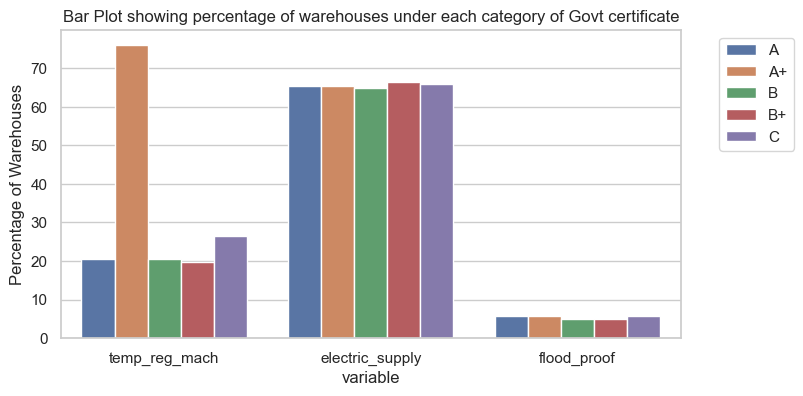

In [32]:
#Plotting the above dataframe

sns.set(style="whitegrid")
plt.figure(figsize=(8,4))

sns.barplot(data=govt_cert.melt(id_vars='approved_wh_govt_certificate'), x='variable', y='value', hue='approved_wh_govt_certificate')

plt.ylabel('Percentage of Warehouses')
plt.title('Bar Plot showing percentage of warehouses under each category of Govt certificate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#### Observations: 

1. More than 75% of the warehouses graded A+ has temperature regulatory machine available.`
2. Availability of electric supply and flood_proofing shows equal distribution among all the categories.

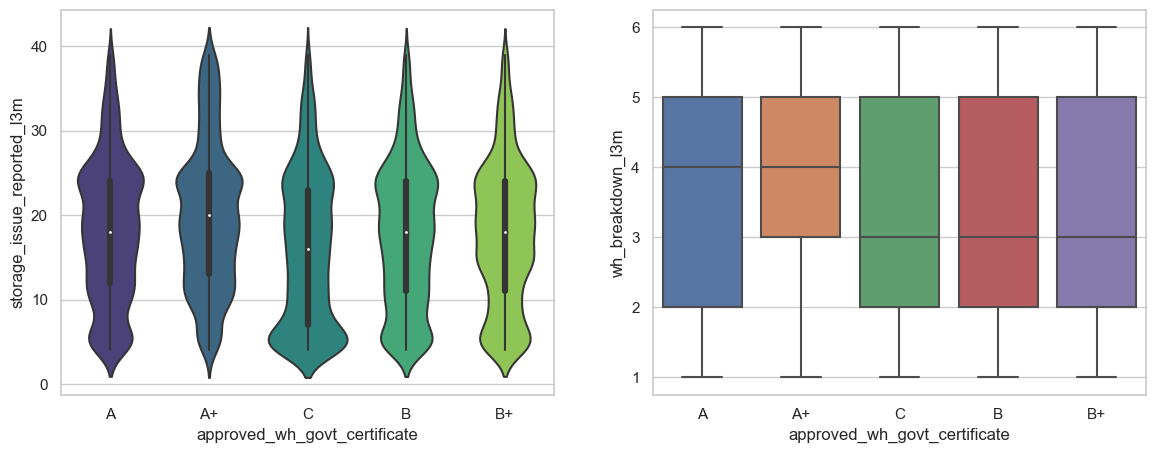

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize=(14,5))

#Plotting govt_cetrificate wise storage_issue_reported_l3m

plt.subplot(1, 2, 1)
sns.violinplot(df,x="approved_wh_govt_certificate",y="storage_issue_reported_l3m",palette=("viridis"))

#Plotting govt_cetrificate wise wh_breakdown_l3m

plt.subplot(1, 2, 2)
sns.boxplot(df,x="approved_wh_govt_certificate",y="wh_breakdown_l3m")

plt.show()
plt.tight_layout()

More number of warehouses graded A+ have high storage issues and Warehouse breakdowns while least in C graded warehouses.

<Axes: xlabel='approved_wh_govt_certificate', ylabel='wh_est_year'>

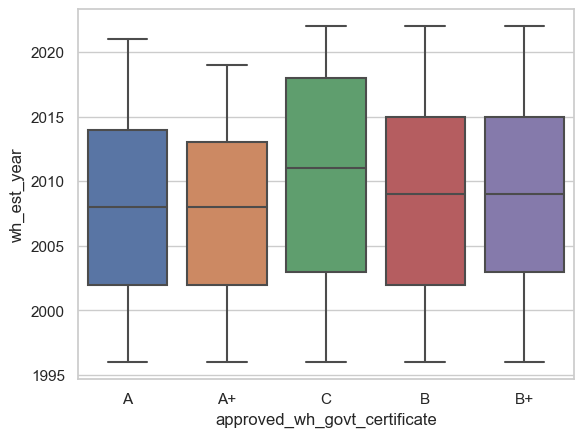

In [34]:
#Plotting govt_cetrificate wise wh_est_yeat

sns.boxplot(df,x="approved_wh_govt_certificate",y="wh_est_year")



<Axes: xlabel='wh_est_year', ylabel='storage_issue_reported_l3m'>

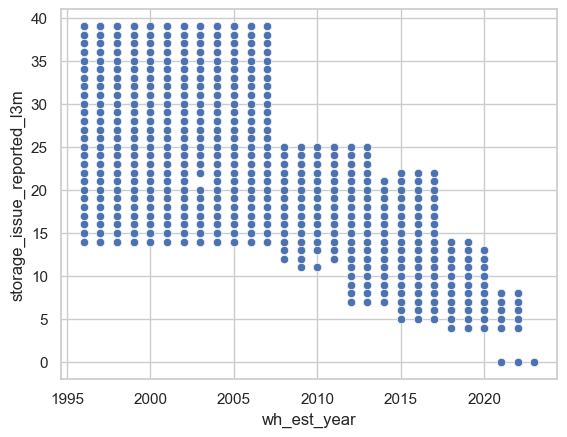

In [35]:
# PLotting wh_est_year vs storage_issue_reported_l3m

sns.scatterplot(df,x="wh_est_year",y="storage_issue_reported_l3m")

* Most of the new warehouses belong to C category where as the older ones belonging to A+ and A category.

* There are more storage issues associated with the older warehouses and less in new warehouses.


### Correlation matrix for numerical variables

In [36]:
numerical_columns = df.select_dtypes(include=['number'])
corr=numerical_columns.corr()

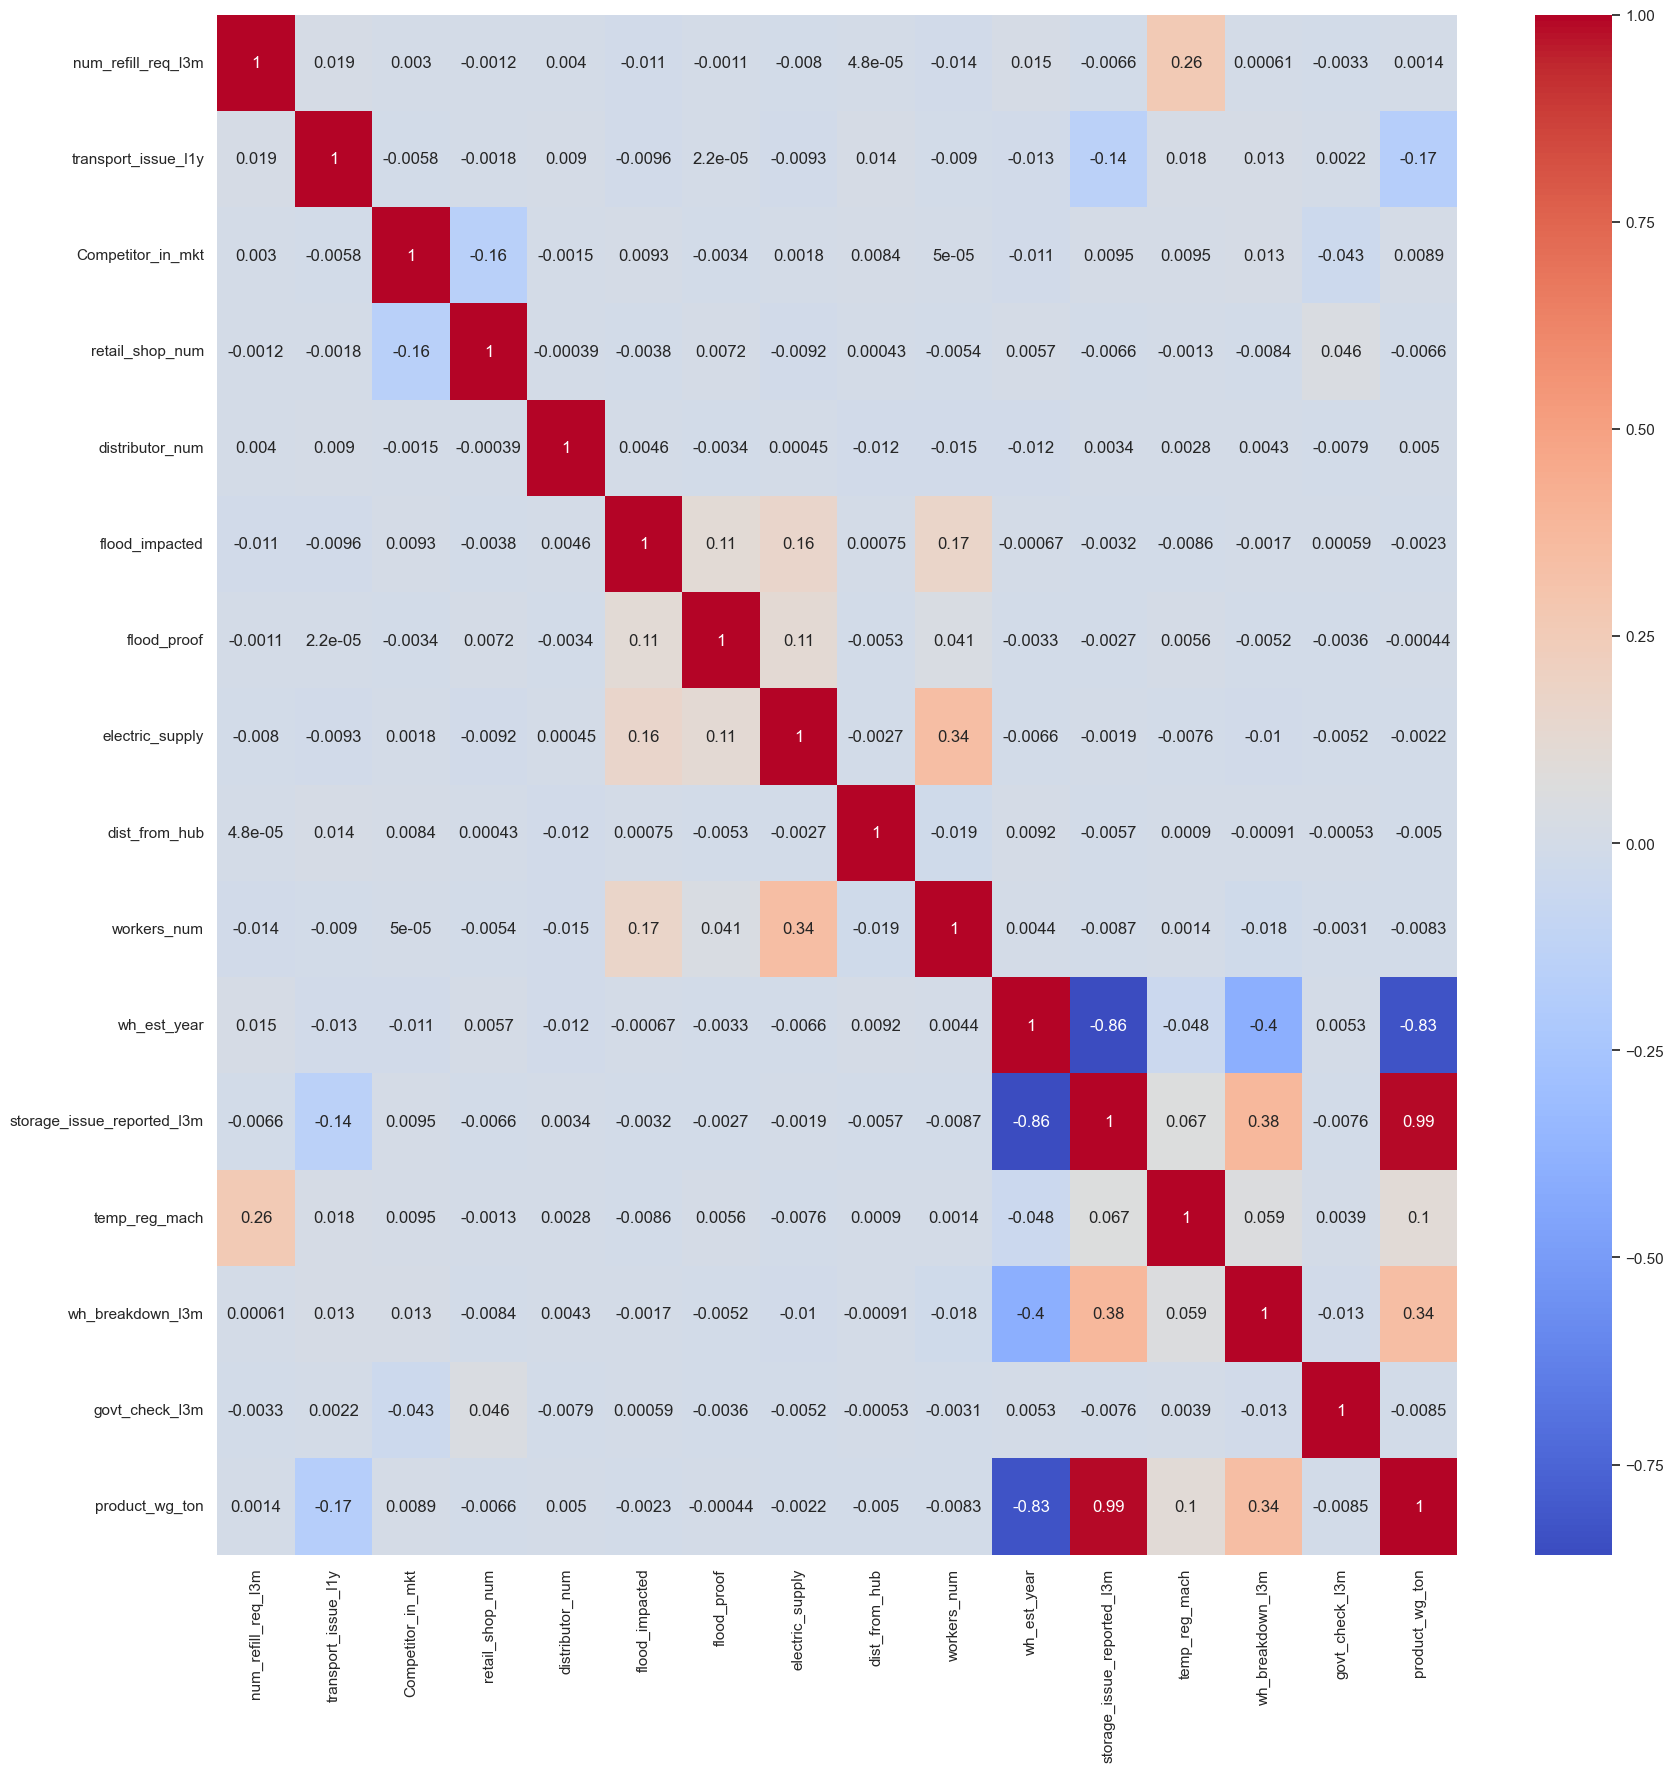

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,cmap="coolwarm")
plt.show()

## Observations from EDA:

1. storage_issues_reported_l3m has 99% correlation with the target variable followed by wh_est_year which is 83%. 

2. wh_est_year has 86% negative correlation with storage_issues_reported_in last 3months and 40% negative correlation with wh_break_down columns.wh_est_year also has more than 48% missing values in tha dataset.Hence the column may be dropped.

3. There are more storage issues associated with the older warehouses which could be due lack of proper infrastructure and maintenance, poor Warehouse storage optimization and stock control techniques required for the product.

4. Even though majority of the warehouses with temperature regulatory machine belongs to A+ category, the storage_issues associated with A+ is higher compared to others. Since most of the warehouses in A+ and A grade are older ones, there may be other factors as mentioned in point 3 which is causing the storage issue of this product.

5. storage_issue_reported and wh_break_down has a weak positive correlation each other which implies there are more storage issues whenever there is warehouse breakdown.

## Hypothesis testing for Categorical columns

In [38]:
import scipy.stats as stats

#Performing t-test on wh_owner_type with product_wg_ton

group1 = df[df['wh_owner_type'] == 'Company Owned']['product_wg_ton']
group2 = df[df['wh_owner_type'] == 'Rented']['product_wg_ton']
t_stat, p_value = stats.ttest_ind(group1, group2)


if p_value < 0.05:
    print(f'Reject the null hypothesis. There is a significant difference between the groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between the groups.')


Fail to reject the null hypothesis. There is no significant difference between the groups.


In [39]:
#Performing t-test on Location_type with product_wg_ton

group1 = df[df['Location_type'] == 'Urban']['product_wg_ton']
group2 = df[df['Location_type'] == 'Rural']['product_wg_ton']

t_stat, p_value = stats.ttest_ind(group1, group2)

if p_value < 0.05:
    print(f'Reject the null hypothesis. There is a significant difference between the groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between the groups.')

Reject the null hypothesis. There is a significant difference between the groups.


In [40]:
#Performing t-test on WH_capacity_size with product_wg_ton

group1 = df[df['WH_capacity_size'] == 'Small']['product_wg_ton']
group2 = df[df['WH_capacity_size'] == 'Mid']['product_wg_ton']
group3 = df[df['WH_capacity_size'] == 'Large']['product_wg_ton']


# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)

# Check the p-value
if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant difference among the groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference among the groups.')

Fail to reject the null hypothesis. There is no significant difference among the groups.


In [41]:
#Performing t-test on approved_wh_govt_certificate with product_wg_ton

group1 = df[df['approved_wh_govt_certificate'] == 'A+']['product_wg_ton']
group2 = df[df['approved_wh_govt_certificate'] == 'A']['product_wg_ton']
group3 = df[df['approved_wh_govt_certificate'] == 'B+']['product_wg_ton']
group4 = df[df['approved_wh_govt_certificate'] == 'B']['product_wg_ton']
group5 = df[df['approved_wh_govt_certificate'] == 'C']['product_wg_ton']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3,group4,group5)

# Check the p-value
if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant difference among the groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference among the groups.')

Reject the null hypothesis. There is a significant difference among the groups.


#### Observations:
As per the hypothesis testing the columns WH_capacity_size and wh_owner_type has no significance  in prediction of target variable.

# DATA PREPROCESSING

In [42]:
#create a copy of dataset

df1=df.copy()

## Dropping columns

In [43]:
#dropping the column - wh_est_year

df1.drop("wh_est_year",axis=1,inplace= True)
df1.drop(["WH_capacity_size","wh_owner_type"],axis=1,inplace=True)

## Fill missing values

In [44]:
#fill missing values in workers_num with mean

df1["workers_num"]=df1["workers_num"].fillna(df1["workers_num"].mean())

#fill missing values in approved_wh_govt_certiticate with mode

df1["approved_wh_govt_certificate"]=df1["approved_wh_govt_certificate"].fillna(df1["approved_wh_govt_certificate"].mode()[0])

## Treating outliers

In [45]:
#Treated outliers in the columns - competitor_in_market,retail_shop_num,workers_num and transport_issue_l1y using IQR method

def outlier_removal(col):
    Q1=col.quantile(0.25)
    Q3=col.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    return col.clip(lower=lower_bound, upper=upper_bound)

columns_to_apply=["Competitor_in_mkt","retail_shop_num","workers_num","transport_issue_l1y"]

df1[columns_to_apply]=df1[columns_to_apply].apply(outlier_removal)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   zone                          25000 non-null  object 
 2   WH_regional_zone              25000 non-null  object 
 3   num_refill_req_l3m            25000 non-null  int64  
 4   transport_issue_l1y           25000 non-null  float64
 5   Competitor_in_mkt             25000 non-null  int64  
 6   retail_shop_num               25000 non-null  float64
 7   distributor_num               25000 non-null  int64  
 8   flood_impacted                25000 non-null  int64  
 9   flood_proof                   25000 non-null  int64  
 10  electric_supply               25000 non-null  int64  
 11  dist_from_hub                 25000 non-null  int64  
 12  workers_num                   25000 non-null  float64
 13  s

## Encoding

In [47]:
#encoding approved_wh_govt_certificate using map function considering it as nominal variable.

df1["approved_wh_govt_certificate"]=df1["approved_wh_govt_certificate"].map({"A+":1,"A":2,"B+":3,"B":4,"C":5})

In [48]:
#One-hot encoding applied on remaining categorical columns

df_encoded = pd.get_dummies(df1, columns=["Location_type","zone","WH_regional_zone"],drop_first=True)

In [49]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_refill_req_l3m            25000 non-null  int64  
 1   transport_issue_l1y           25000 non-null  float64
 2   Competitor_in_mkt             25000 non-null  int64  
 3   retail_shop_num               25000 non-null  float64
 4   distributor_num               25000 non-null  int64  
 5   flood_impacted                25000 non-null  int64  
 6   flood_proof                   25000 non-null  int64  
 7   electric_supply               25000 non-null  int64  
 8   dist_from_hub                 25000 non-null  int64  
 9   workers_num                   25000 non-null  float64
 10  storage_issue_reported_l3m    25000 non-null  int64  
 11  temp_reg_mach                 25000 non-null  int64  
 12  approved_wh_govt_certificate  25000 non-null  int64  
 13  w

### Test the model statistics using OLS

In [50]:
# Separating Dependent and independent variables

X=df_encoded.drop("product_wg_ton",axis=1)
Y=df_encoded["product_wg_ton"]

In [51]:
import statsmodels.api as sm

X_OLS = sm.add_constant(X)

OLS_model = sm.OLS(Y,X_OLS).fit()

OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.473e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:26:45   Log-Likelihood:            -2.2216e+05
No. Observations:               25000   AIC:                         4.444e+05
Df Residuals:                   24975   BIC:                         4.446e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1809.0778    151.614     11.932      0.000    1511.906    2106.249
num_refill_req_l3m              -1.5476      4.416     -0.350      0.726     -10.203       7.108
transport_issue_l1y           -416.3226     12.254    -33.973      0.000    -440.342    -392.303
Competitor_in_mkt               -6.9664     11.161     -0.624      0.533     -28.843      14.910
retail_shop_num                 -0.0066      0.012     -0.569      0.569      -0.029       0.016
distributor_num                  1.3533      0.690      1.962      0.050       0.001       2.705
flood_impacted                  26.0037     38.137      0.682      0.495     -48.747     100.754
flood_proof                     98.3655     49.270      1.996      0.046       1.794     194.937
electric_supply                -23.6773     25.259     -0.937      0.349     -73.186      25.832
dist_from_hub                    0.1852      0.177      1.048      0.295      -0.161       0.532
workers_num                     -0.6968      1.671     -0.417      0.677      -3.973       2.579
storage_issue_reported_l3m    1254.1408      1.347    931.375      0.000    1251.501    1256.780
temp_reg_mach                  857.7056     26.181     32.760      0.000     806.389     909.023
approved_wh_govt_certificate  -104.2090      8.341    -12.494      0.000    -120.558     -87.860
wh_breakdown_l3m              -233.9214      7.134    -32.789      0.000    -247.905    -219.938
govt_check_l3m                  -1.9327      1.376     -1.405      0.160      -4.629       0.763
Location_type_Urban            -98.7898     40.595     -2.434      0.015    -178.358     -19.221
zone_North                      75.4204     89.962      0.838      0.402    -100.911     251.752
zone_South                      37.0380     92.391      0.401      0.689    -144.053     218.129
zone_West                       47.4418     88.874      0.534      0.593    -126.756     221.640
WH_regional_zone_Zone 2        -20.4655     50.639     -0.404      0.686    -119.721      78.790
WH_regional_zone_Zone 3        -53.8421     50.930     -1.057      0.290    -153.668      45.983
WH_regional_zone_Zone 4        -44.9053     47.739     -0.941      0.347    -138.477      48.667
WH_regional_zone_Zone 5        -47.3585     46.887     -1.010      0.312    -139.259      44.542
WH_regional_zone_Zone 6        -50.1247     43.589     -1.150      0.250    -135.563      35.313
==============================================================================
Omnibus:                     7726.114   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42193.339
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                       8.731   Cond. No.  

### VIF scores of all independent Columns

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                        Variable        VIF
0             num_refill_req_l3m   3.704452
1            transport_issue_l1y   1.550588
2              Competitor_in_mkt   8.968701
3                retail_shop_num  22.944458
4                distributor_num   7.677575
5                 flood_impacted   1.162952
6                    flood_proof   1.081276
7                electric_supply   3.416641
8                  dist_from_hub   7.521341
9                    workers_num  18.273692
10    storage_issue_reported_l3m   5.476420
11                 temp_reg_mach   1.688761
12  approved_wh_govt_certificate   6.568931
13              wh_breakdown_l3m   6.118320
14                govt_check_l3m   6.392035
15           Location_type_Urban   1.097904
16                    zone_North  16.306571
17                    zone_South  10.368643
18                     zone_West  12.557074
19       WH_regional_zone_Zone 2   2.372187
20       WH_regional_zone_Zone 3   2.314082
21       WH_regional_zone_Zone 4

In [53]:
#retail_shop_num,workers_num showing high VIF values. Hence the columns are dropped.

df_encoded.drop(["retail_shop_num","workers_num"],axis=1)

X=df_encoded.drop("product_wg_ton",axis=1)
Y=df_encoded["product_wg_ton"]

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred=OLS_model.predict(X_OLS)

mse=round(mean_squared_error(Y,y_pred),2)
mae=round(mean_absolute_error(Y,y_pred),2)
print(f"For test data : \n mse = {mse}   mae = {mae}")

For test data : 
 mse = 3063474.88   mae = 1286.47


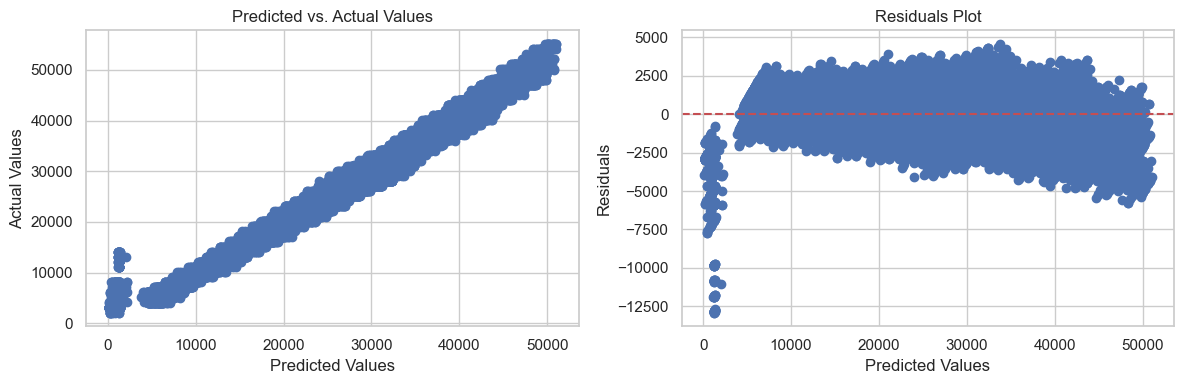

In [55]:
plt.figure(figsize=(12, 4))

residuals = y_pred - Y

# Scatter plot of predicted vs. actual values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, Y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")

# Residuals plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Plot")

plt.tight_layout()

plt.show()



We can see a pattern of errors at point 0.i.e the model is predicting the output as 0 for some values of Y. But the product weight(Y) cannot be 0.

In [56]:
#Finding columns with values as 0
zero_columns = df.columns[df.eq(0).any()]
zero_columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'flood_impacted', 'flood_proof', 'electric_supply',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m'],
      dtype='object')

The columns storage_issues_reported_l3m,wh_breakdown_l3m are having significantly large coefficients and the 0 values in them are making the prediction as 0.

In [57]:
#checking if the missing values in above two columns pertains to same warehouses

df[df["wh_breakdown_l3m"]==0]["wh_breakdown_l3m"].equals(df[df["storage_issue_reported_l3m"]==0]["storage_issue_reported_l3m"])

True

It is possible that the 0 value in these columns represent some missing values or not reported rather than the actual 0 itself. 
Hence we may remove these datapoints from the dataset.

In [58]:
df_encoded.drop(df[df['storage_issue_reported_l3m'] == 0].index,inplace=True)

In [59]:
#Finding the OLS scores and errors gain after processing.

X=df_encoded.drop("product_wg_ton",axis=1)
Y=df_encoded["product_wg_ton"]

X_OLS = sm.add_constant(X)

OLS_model = sm.OLS(Y,X_OLS).fit()

In [60]:
y_pred=OLS_model.predict(X_OLS)

mse=round(mean_squared_error(Y,y_pred),2)
mae=round(mean_absolute_error(Y,y_pred),2)
print(f"For test data : \n mse = {mse}   mae = {mae}")

For test data : 
 mse = 1938601.14   mae = 1085.09


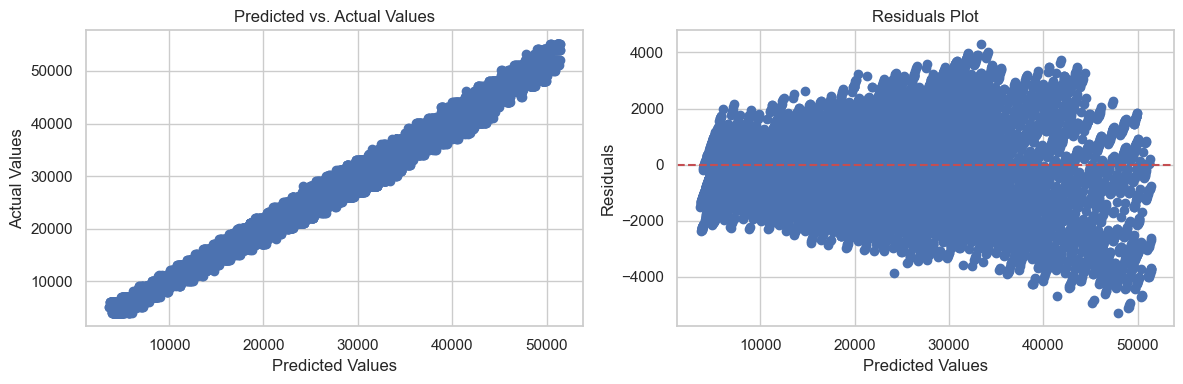

In [61]:
plt.figure(figsize=(12, 4))

residuals = y_pred - Y

# Scatter plot of predicted vs. actual values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, Y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")

# Residuals plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Plot")

plt.tight_layout()

plt.show()

### Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=100)

### Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

# MODEL TRAINING AND EVALUATION

In [64]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [65]:
#Linear Regression

lr_model=LinearRegression()

lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=lr_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 1914853.51   mae = 1077.94   r_squared = 0.9848
For training data : 
 mse = 1945476.17   mae = 1086.79   r_squared = 0.9849


In [66]:
#Lasso

lasso_model=Lasso()

lasso_model.fit(X_train,y_train)
y_pred=lasso_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=lasso_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 1912576.34   mae = 1077.03   r_squared = 0.9849
For training data : 
 mse = 1945649.69   mae = 1086.65   r_squared = 0.9849


In [67]:
#Ridge

ridge_model=Ridge(alpha=0.5)

ridge_model.fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=ridge_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 1914856.89   mae = 1077.93   r_squared = 0.9848
For training data : 
 mse = 1945476.26   mae = 1086.77   r_squared = 0.9849


In [68]:
#SGR
from sklearn.linear_model import SGDRegressor
sgd_model=SGDRegressor(penalty="l1")

sgd_model.fit(X_train,y_train)
y_pred=sgd_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=sgd_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 1922311.56   mae = 1080.64   r_squared = 0.9848
For training data : 
 mse = 1950284.77   mae = 1088.71   r_squared = 0.9849


In [69]:
#SVM with linear kernel

svr=SVR(kernel='linear')
svr_model=svr.fit(X_train,y_train)

y_pred=svr_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=svr_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 3634205.26   mae = 1419.99   r_squared = 0.9712
For training data : 
 mse = 3698960.45   mae = 1435.35   r_squared = 0.9714


In [70]:
#KNN

knn=KNeighborsRegressor(n_neighbors=7)
knn_model=knn.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=knn_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 34413879.5   mae = 4622.37   r_squared = 0.7277
For training data : 
 mse = 25422219.45   mae = 3962.77   r_squared = 0.8033


In [71]:
# Decision Tree

dt_model=DecisionTreeRegressor(random_state=100)

dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=dt_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 1353242.66   mae = 811.73   r_squared = 0.9893
For training data : 
 mse = 0.0   mae = 0.0   r_squared = 1.0


In [72]:
#Random Forest

rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=rf_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 744431.81   mae = 667.25   r_squared = 0.9941
For training data : 
 mse = 107261.35   mae = 250.36   r_squared = 0.9992


In [73]:
#XG Boost

xgb=XGBRegressor()
xgb_model=xgb.fit(X_train,y_train)

y_pred=xgb_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=xgb_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 749317.07   mae = 676.86   r_squared = 0.9941
For training data : 
 mse = 384097.22   mae = 477.04   r_squared = 0.997


In [74]:
#Gradient Boosting Algorithm

gb=GradientBoostingRegressor()
gb_model=gb.fit(X_train,y_train)

y_pred=gb_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=gb_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 694309.31   mae = 659.54   r_squared = 0.9945
For training data : 
 mse = 679683.04   mae = 652.24   r_squared = 0.9947


In [75]:
#adaboost

from sklearn.ensemble import AdaBoostRegressor

abr=AdaBoostRegressor()
abr_model=abr.fit(X_train,y_train)

y_pred=abr_model.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=abr_model.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")


For test data : 
 mse = 2373379.94   mae = 1235.49   r_squared = 0.9812
For training data : 
 mse = 2392615.15   mae = 1245.18   r_squared = 0.9815


### Hyperparameter tuning the best performing models:
### Decsion tree,Random forest,XG Boost and Gradient Boost

In [76]:
#Hyperparameter tuning Decsion Tree
param_grid = {'max_depth':[2,4,6,8,12,15],'min_samples_split':[6,10,20,25]}

dt=DecisionTreeRegressor(random_state=100)
grid=RandomizedSearchCV(dt,param_grid,cv=5,scoring='neg_mean_squared_error')

grid.fit(x_train,y_train)
grid.best_params_

{'min_samples_split': 10, 'max_depth': 8}

In [77]:
# Decision Tree

dt_best=DecisionTreeRegressor(random_state=100,min_samples_split=10,max_depth=8)

dt_best.fit(X_train,y_train)
y_pred=dt_best.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=dt_best.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 774902.91   mae = 682.47   r_squared = 0.9939
For training data : 
 mse = 726876.58   mae = 658.07   r_squared = 0.9944


In [78]:
#Hyperparameter tuning Random Forest

param_grid = {'n_estimators':[25,30,35,45,55,60]}

rf=RandomForestRegressor(random_state=100)
grid1=RandomizedSearchCV(rf,param_grid,cv=5,scoring='neg_mean_squared_error')

grid1.fit(x_train,y_train)
grid1.best_params_

{'n_estimators': 60}

In [79]:
# Random Forest

rf_best=RandomForestRegressor(random_state=100,min_samples_split=10,max_depth=8,n_estimators=60)

rf_best.fit(X_train,y_train)
y_pred=rf_best.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=rf_best.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 740299.85   mae = 669.26   r_squared = 0.9941
For training data : 
 mse = 685254.42   mae = 641.25   r_squared = 0.9947


In [80]:
#Hyperparameter tuning XG Boost

param_grid={'learning_rate':[0.05,0.1,0.15,0.2],'max_depth':[4,8,12,16,18,20],'n_estimators':[30,50,80,100,120]}

xg=XGBRegressor(random_state=100)
grid2=RandomizedSearchCV(xg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid2.fit(x_train,y_train)
grid2.best_params_


{'n_estimators': 120, 'max_depth': 4, 'learning_rate': 0.1}

In [81]:
# XG Boost

xgb_best=XGBRegressor(random_state=100,learning_rate=0.10,max_depth=4,n_estimators=120)

xgb_best.fit(X_train,y_train)
y_pred=xgb_best.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=xgb_best.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 683870.02   mae = 649.53   r_squared = 0.9946
For training data : 
 mse = 643643.11   mae = 630.62   r_squared = 0.995


In [82]:
#Hyper Parameter Tuning Gradient Boosting Algorithm

param_grid={'learning_rate':[0.1,0.15,0.2],'max_depth':[4,8,12,16,20],'n_estimators':[30,50,80,100]}

gbr=GradientBoostingRegressor(random_state=55)
grid3=RandomizedSearchCV(gbr,param_grid,cv=5,scoring='neg_mean_squared_error')

grid3.fit(x_train,y_train)
grid3.best_params_

{'n_estimators': 80, 'max_depth': 4, 'learning_rate': 0.2}

In [90]:
# Gradient Boost

gbr_best=GradientBoostingRegressor(random_state=100,learning_rate=0.20,max_depth=4,n_estimators=80)

gbr_best.fit(X_train,y_train)
y_pred=gbr_best.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=gbr_best.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 695890.33   mae = 657.52   r_squared = 0.9945
For training data : 
 mse = 629524.63   mae = 624.29   r_squared = 0.9951


In [92]:
from tabulate import tabulate

In [93]:
table = [['Model_Name', 'Training_mse', 'Testing_mse', 'Testing_mae', 'Testing_r2'], 
         ['Desicion Tree',726876,774903,682,0.9939],
         ['Random Forest', 685254, 740300, 669, 0.9941], 
         ['XGBoost', 643643, 683870, 649, 0.9946], 
         ['Gradient Boosting', 629525, 695890, 657, 0.9945]]

print(tabulate(table, headers = 'firstrow', tablefmt = "fancy_grid"))

╒═══════════════════╤════════════════╤═══════════════╤═══════════════╤══════════════╕
│ Model_Name        │   Training_mse │   Testing_mse │   Testing_mae │   Testing_r2 │
╞═══════════════════╪════════════════╪═══════════════╪═══════════════╪══════════════╡
│ Desicion Tree     │         726876 │        774903 │           682 │       0.9939 │
├───────────────────┼────────────────┼───────────────┼───────────────┼──────────────┤
│ Random Forest     │         685254 │        740300 │           669 │       0.9941 │
├───────────────────┼────────────────┼───────────────┼───────────────┼──────────────┤
│ XGBoost           │         643643 │        683870 │           649 │       0.9946 │
├───────────────────┼────────────────┼───────────────┼───────────────┼──────────────┤
│ Gradient Boosting │         629525 │        695890 │           657 │       0.9945 │
╘═══════════════════╧════════════════╧═══════════════╧═══════════════╧══════════════╛


#### XGBoost is the best model for predicting Warehouse supply.

In [94]:
# XG Boost

xgb_best=XGBRegressor(random_state=100,learning_rate=0.10,max_depth=4,n_estimators=120)

xgb_best.fit(X_train,y_train)
y_pred=xgb_best.predict(X_test)

mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),4)
print(f"For test data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

y_pred_train=xgb_best.predict(X_train)

mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),4)
print(f"For training data : \n mse = {mse}   mae = {mae}   r_squared = {r2}")

For test data : 
 mse = 683870.02   mae = 649.53   r_squared = 0.9946
For training data : 
 mse = 643643.11   mae = 630.62   r_squared = 0.995


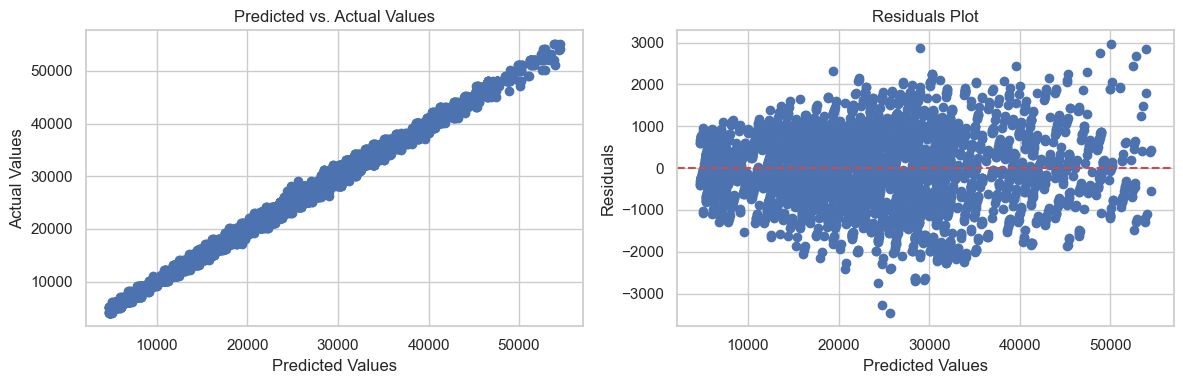

In [95]:
plt.figure(figsize=(12, 4))

residuals = y_pred - y_test

# Scatter plot of predicted vs. actual values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")

# Residuals plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Plot")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

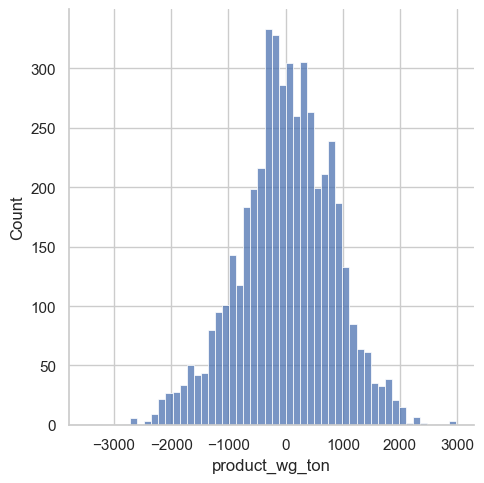

In [96]:
#checking the distribution of residuals

sns.displot(residuals)

In [97]:
# Extract feature importance from the trained model
feature_importance = (xgb_best.feature_importances_*100).round(4)

feature_names = x_train.columns 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
10    storage_issue_reported_l3m   96.866402
12  approved_wh_govt_certificate    1.611200
11                 temp_reg_mach    0.750700
1            transport_issue_l1y    0.462900
13              wh_breakdown_l3m    0.036700
6                    flood_proof    0.021300
3                retail_shop_num    0.018900
15           Location_type_Urban    0.018200
21       WH_regional_zone_Zone 4    0.017700
4                distributor_num    0.017300
23       WH_regional_zone_Zone 6    0.017200
0             num_refill_req_l3m    0.015900
14                govt_check_l3m    0.015700
8                  dist_from_hub    0.015300
5                 flood_impacted    0.014700
9                    workers_num    0.013800
17                    zone_South    0.012700
2              Competitor_in_mkt    0.012700
16                    zone_North    0.012200
22       WH_regional_zone_Zone 5    0.011200
18                     zone_West    0.010100
20       W

#### * Even though the model is able to predict the Warehouse supply with 99% accuracy, it can be observed that the storage issues reported is acting as main predictor. 

#### * Since storage issues dominates over all the other features, error is higher specially at extreme values of target variable.

### Recommendations:

  1. It is recommended that the management to check the infrastructure and optimisation strategies adopted by the Warehouses especially the warehouses established prior to 2015 as these warehouses are reporting the maximum storage issues.
  2. Reducing the storage issues will directly reduce the cost caused due to damage of products.
  2. Providing sales report associated with each warehouse can give more insights to demand vs supply of each Warehouse.
  